# Lab 0 - Fundamentals of Signal Processing 

In [8]:
#Libraries 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


### (1) Generate and plot the following signals.

##### Unit Step Function 

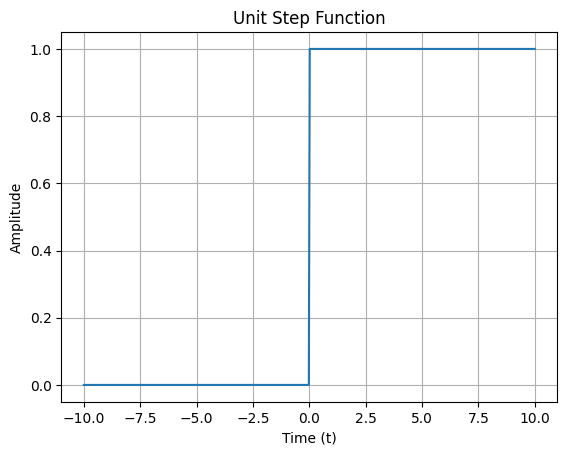

In [3]:
t=np.linspace(-10, 10, 500)

#Unit Step Function
unit_step = np.heaviside(t, 1)

#Graph
plt.figure()
plt.plot(t, unit_step, label='Unit Step')
plt.title('Unit Step Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


##### Unit Impulse Function 

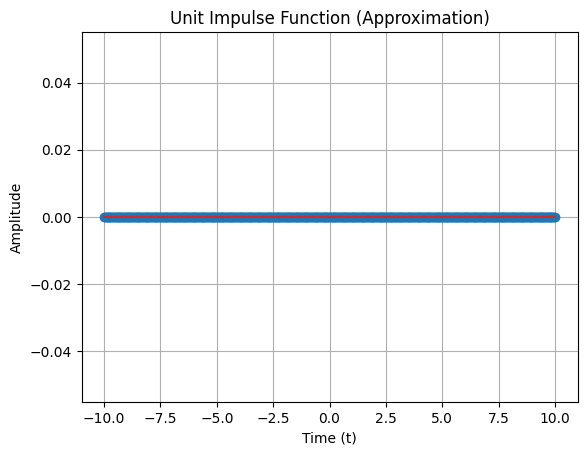

In [4]:
t= np.linspace(-10, 10, 500)

# Unit Impulse function  
unit_impulse = np.zeros_like(t)
unit_impulse[np.abs(t) < 0.01] = 1  

# Graph
plt.figure()
plt.stem(t, unit_impulse, label='Unit Impulse')
plt.title('Unit Impulse Function (Approximation)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


##### Ramp Function 

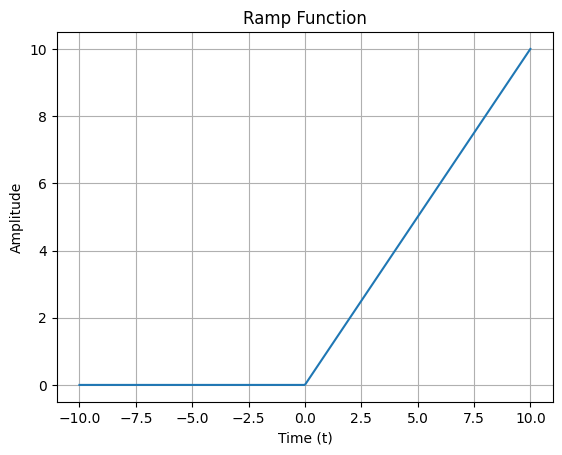

In [5]:
t = np.linspace(-10, 10, 500)

# Ramp Function
ramp = np.maximum(0, t)

# Graph
plt.figure()
plt.plot(t, ramp, label='Ramp Function')
plt.title('Ramp Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


##### Exponential Signal(decaying and growing)

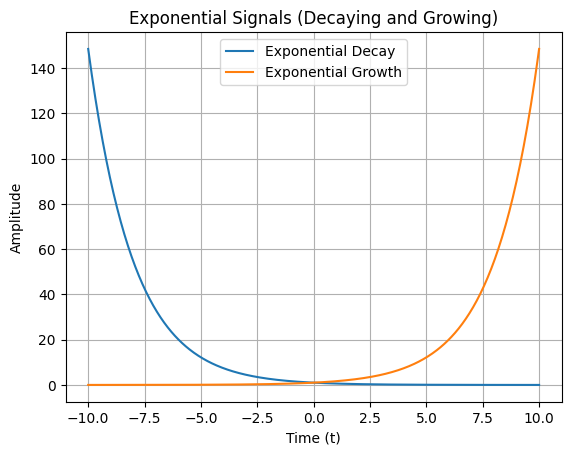

In [6]:
#Exponential Signals (decaying and growing)
exp_decay = np.exp(-0.5 * t)
exp_grow = np.exp(0.5 * t)

# Graph
plt.figure()
plt.plot(t, exp_decay, label='Exponential Decay')
plt.plot(t, exp_grow, label='Exponential Growth')
plt.title('Exponential Signals (Decaying and Growing)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


##### Sinusodial Signal 

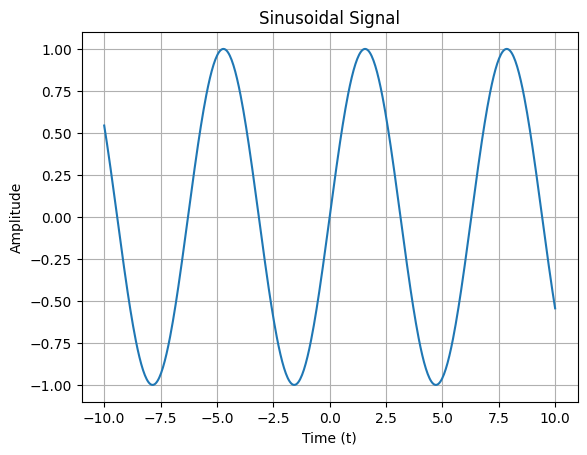

In [7]:
# Sinusoidal Signal
sinusoidal = np.sin(t)

# Graph
plt.figure()
plt.plot(t, sinusoidal, label='Sinusoidal Signal')
plt.title('Sinusoidal Signal')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## You are asked to visualize the effects of sampling and reconstructing a continuous-time signal.

##### Generate a continuous sinusoidal signal.

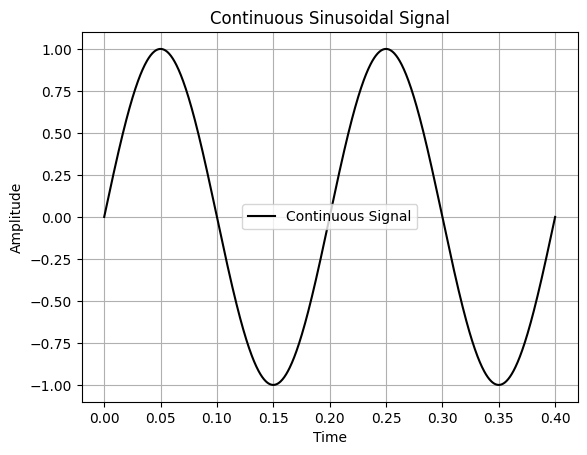

In [9]:
# Parameters
frequency = 5  
T = 1 / frequency  
t_continuous = np.linspace(0, 2 * T, 1000)  

#Continuous Sinusoidal Signal
continuous_signal = np.sin(2 * np.pi * frequency * t_continuous)

# Graph
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


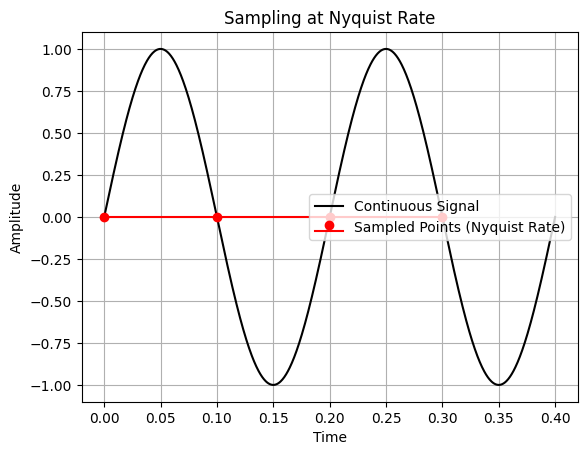

In [10]:
# Sampling Rate at Nyquist Rate
nyquist_rate = 2 * frequency
t_sampled_nyquist = np.arange(0, 2 * T, 1 / nyquist_rate)
sampled_signal_nyquist = np.sin(2 * np.pi * frequency * t_sampled_nyquist)

# Graph
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.stem(t_sampled_nyquist, sampled_signal_nyquist, label='Sampled Points (Nyquist Rate)', linefmt='r-', markerfmt='ro', basefmt='r-')
plt.title('Sampling at Nyquist Rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


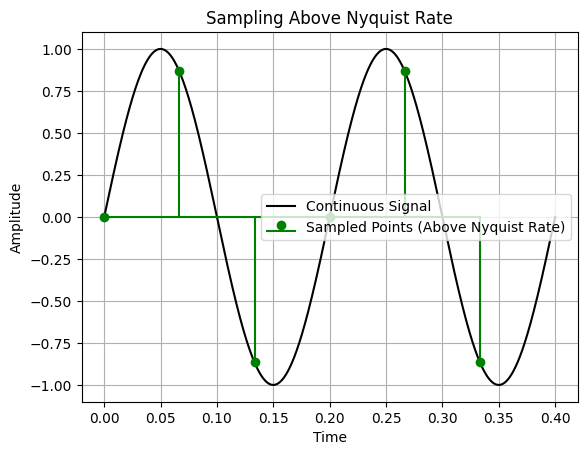

In [11]:
# Sampling Rate Above Nyquist Rate
above_nyquist_rate = 3 * frequency
t_sampled_above = np.arange(0, 2 * T, 1 / above_nyquist_rate)
sampled_signal_above = np.sin(2 * np.pi * frequency * t_sampled_above)

# Graph
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.stem(t_sampled_above, sampled_signal_above, label='Sampled Points (Above Nyquist Rate)', linefmt='g-', markerfmt='go', basefmt='g-')
plt.title('Sampling Above Nyquist Rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


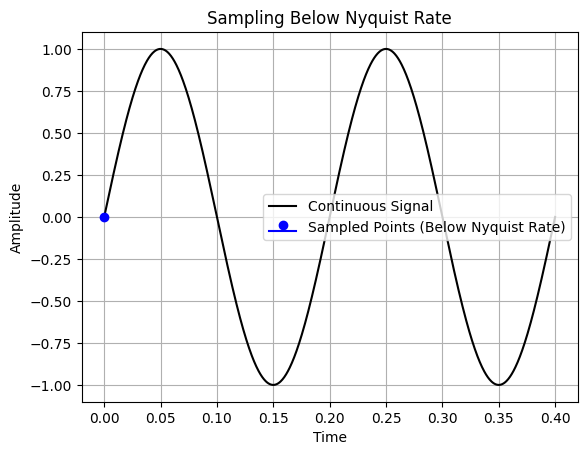

In [12]:
# Sampling Rate Below Nyquist Rate
below_nyquist_rate = frequency / 2
t_sampled_below = np.arange(0, 2 * T, 1 / below_nyquist_rate)
sampled_signal_below = np.sin(2 * np.pi * frequency * t_sampled_below)

# Plot Continuous and Sampled Signals Below Nyquist Rate
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.stem(t_sampled_below, sampled_signal_below, label='Sampled Points (Below Nyquist Rate)', linefmt='b-', markerfmt='bo', basefmt='b-')
plt.title('Sampling Below Nyquist Rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


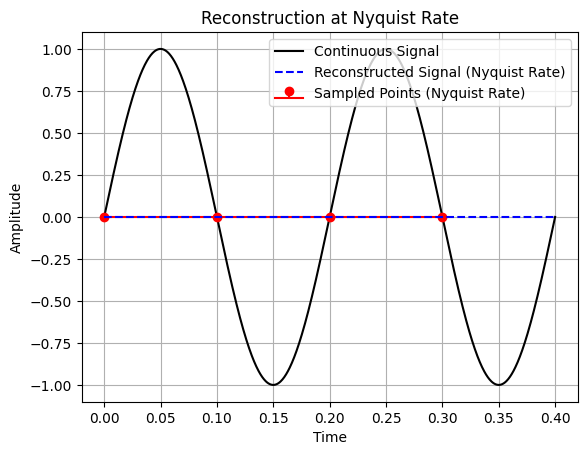

In [13]:
# Reconstruction using linear interpolation
interpolator_nyquist = interp1d(t_sampled_nyquist, sampled_signal_nyquist, kind='linear', fill_value="extrapolate")
t_reconstructed_nyquist = np.linspace(0, 2 * T, 1000)
reconstructed_signal_nyquist = interpolator_nyquist(t_reconstructed_nyquist)

# Graph
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.stem(t_sampled_nyquist, sampled_signal_nyquist, label='Sampled Points (Nyquist Rate)', linefmt='r-', markerfmt='ro', basefmt='r-')
plt.plot(t_reconstructed_nyquist, reconstructed_signal_nyquist, label='Reconstructed Signal (Nyquist Rate)', linestyle='--', color='blue')
plt.title('Reconstruction at Nyquist Rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


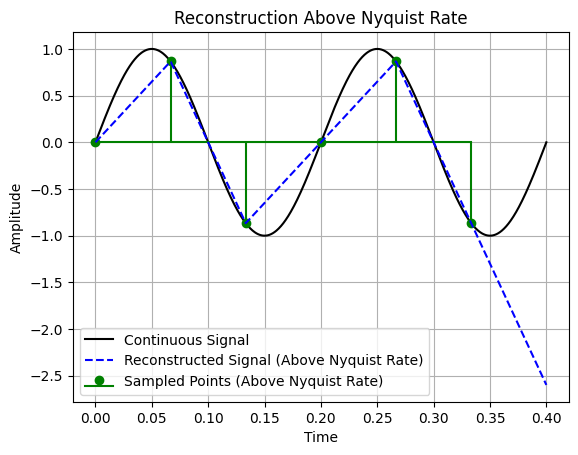

In [14]:
# Reconstruction using linear interpolation
interpolator_above = interp1d(t_sampled_above, sampled_signal_above, kind='linear', fill_value="extrapolate")
t_reconstructed_above = np.linspace(0, 2 * T, 1000)
reconstructed_signal_above = interpolator_above(t_reconstructed_above)

# Graph
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.stem(t_sampled_above, sampled_signal_above, label='Sampled Points (Above Nyquist Rate)', linefmt='g-', markerfmt='go', basefmt='g-')
plt.plot(t_reconstructed_above, reconstructed_signal_above, label='Reconstructed Signal (Above Nyquist Rate)', linestyle='--', color='blue')
plt.title('Reconstruction Above Nyquist Rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


c:\Users\kiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\interpolate\_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


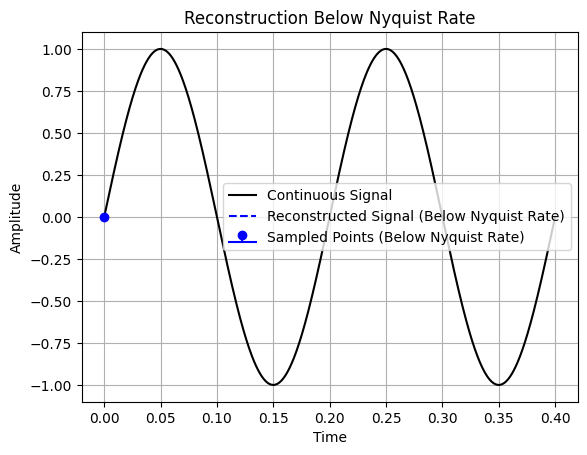

In [15]:
# Reconstruction using linear interpolation
interpolator_below = interp1d(t_sampled_below, sampled_signal_below, kind='linear', fill_value="extrapolate")
t_reconstructed_below = np.linspace(0, 2 * T, 1000)
reconstructed_signal_below = interpolator_below(t_reconstructed_below)

# Graph
plt.figure()
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')
plt.stem(t_sampled_below, sampled_signal_below, label='Sampled Points (Below Nyquist Rate)', linefmt='b-', markerfmt='bo', basefmt='b-')
plt.plot(t_reconstructed_below, reconstructed_signal_below, label='Reconstructed Signal (Below Nyquist Rate)', linestyle='--', color='blue')
plt.title('Reconstruction Below Nyquist Rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


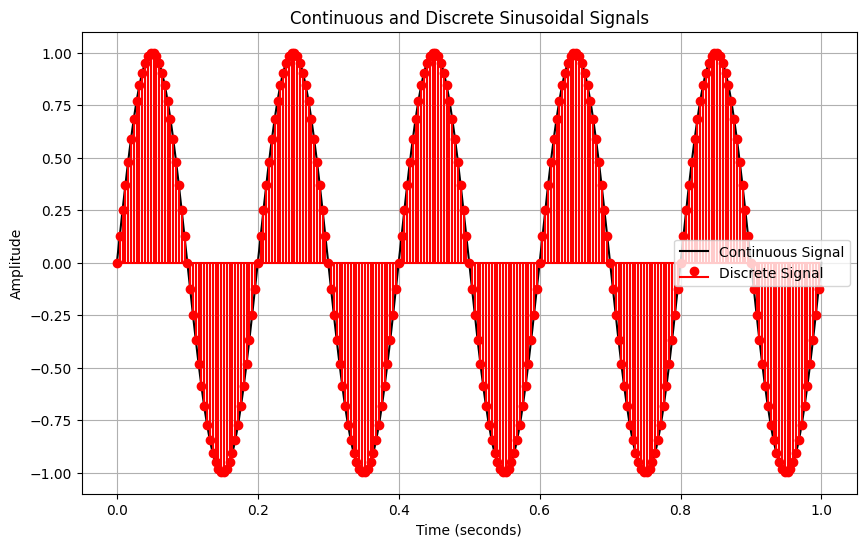

In [17]:
# Parameters
amplitude = 1
frequency = 5  
duration = 1   
sampling_rate = 50 * frequency  

# Time vectors

# Continuous time vector
t_continuous = np.linspace(0, duration, 1000)  

 # Discrete time vector
t_discrete = np.arange(0, duration, 1 / sampling_rate) 

#Signals
continuous_signal = amplitude * np.sin(2 * np.pi * frequency * t_continuous)
discrete_signal = amplitude * np.sin(2 * np.pi * frequency * t_discrete)

# Graph
plt.figure(figsize=(10, 6))

# Cont Signal 
plt.plot(t_continuous, continuous_signal, label='Continuous Signal', color='black')

#  Discrete Signal
plt.stem(t_discrete, discrete_signal, label='Discrete Signal', linefmt='r-', markerfmt='ro', basefmt='r-')
plt.title('Continuous and Discrete Sinusoidal Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


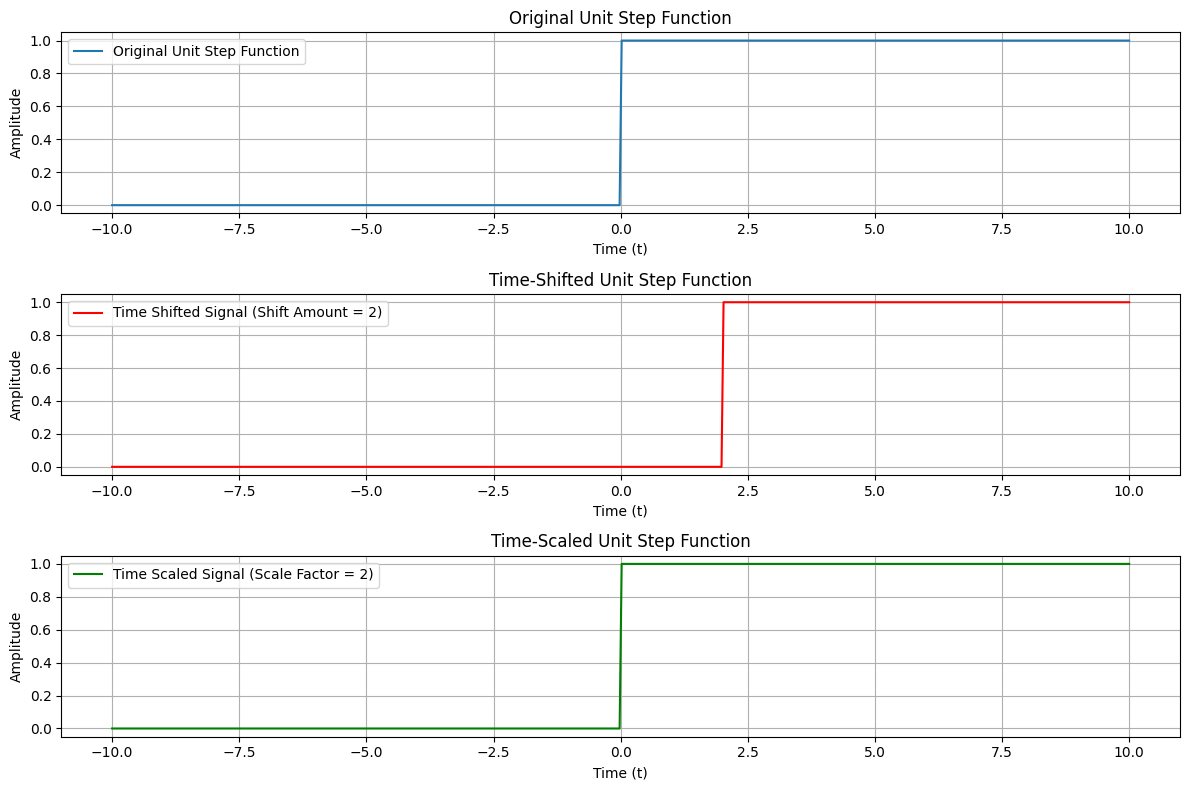

In [18]:
t = np.linspace(-10, 10, 500)

# (a) Generate a Unit Step Function
unit_step = np.heaviside(t, 1)

# Parameters for transformations
shift_amount = 2  
scale_factor = 2  

# (b) Perform Time Shifting
t_shifted = t - shift_amount
unit_step_shifted = np.heaviside(t_shifted, 1)

# (c) Perform Time Scaling
t_scaled = t / scale_factor
unit_step_scaled = np.heaviside(t_scaled, 1)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Original Signal
plt.subplot(3, 1, 1)
plt.plot(t, unit_step, label='Original Unit Step Function')
plt.title('Original Unit Step Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Time-Shifted Signal
plt.subplot(3, 1, 2)
plt.plot(t, unit_step_shifted, label='Time Shifted Signal (Shift Amount = 2)', color='r')
plt.title('Time-Shifted Unit Step Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Time-Scaled Signal
plt.subplot(3, 1, 3)
plt.plot(t, unit_step_scaled, label='Time Scaled Signal (Scale Factor = 2)', color='g')
plt.title('Time-Scaled Unit Step Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


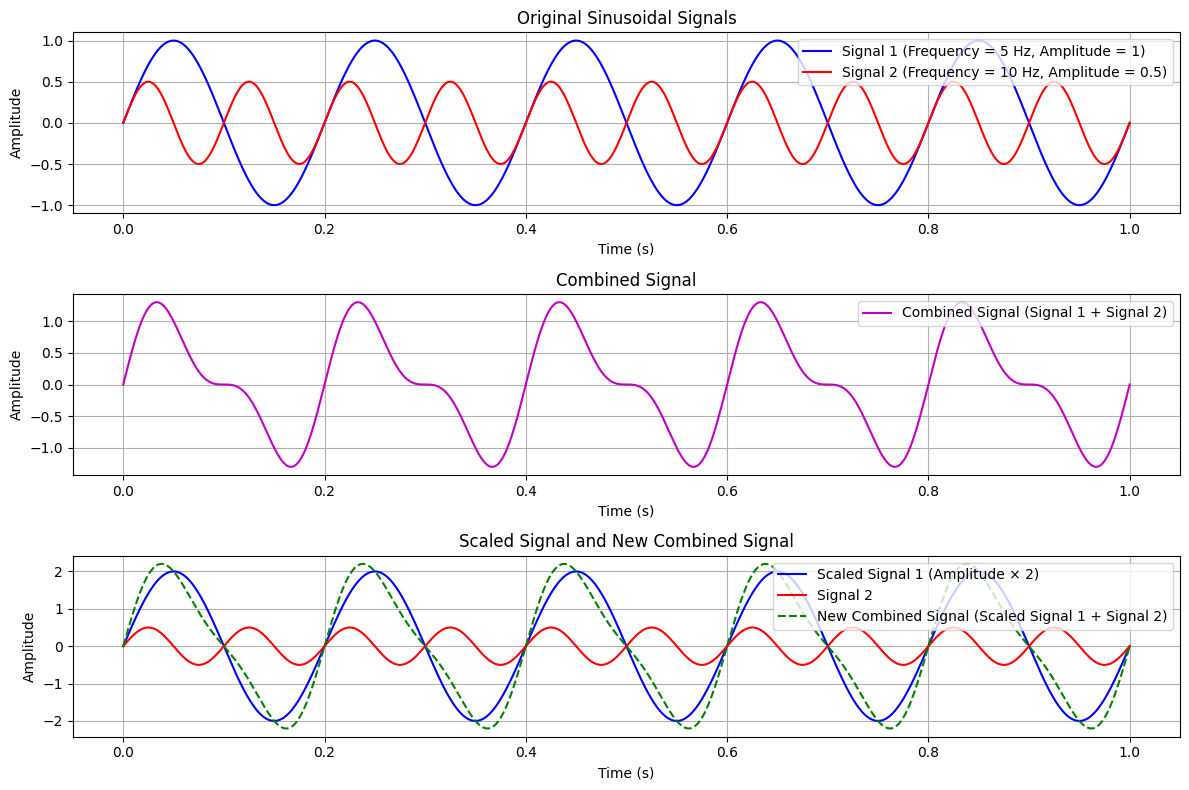

In [19]:
# Parameters
t = np.linspace(0, 1, 1000)

# (a) Generate Two Sinusoidal Signals
frequency1 = 5 
amplitude1 = 1   
frequency2 = 10  
amplitude2 = 0.5 

signal1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t)
signal2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t)

# (b) Add the Signals Together
combined_signal = signal1 + signal2

# (c) Scale One of the Signals
scale_factor = 2
scaled_signal1 = amplitude1 * scale_factor * np.sin(2 * np.pi * frequency1 * t)
combined_scaled_signal = scaled_signal1 + signal2

# Plotting
plt.figure(figsize=(12, 8))

# Plot Original Signals
plt.subplot(3, 1, 1)
plt.plot(t, signal1, label='Signal 1 (Frequency = 5 Hz, Amplitude = 1)', color='b')
plt.plot(t, signal2, label='Signal 2 (Frequency = 10 Hz, Amplitude = 0.5)', color='r')
plt.title('Original Sinusoidal Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Combined Signal
plt.subplot(3, 1, 2)
plt.plot(t, combined_signal, label='Combined Signal (Signal 1 + Signal 2)', color='m')
plt.title('Combined Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Scaled Signal and New Combined Signal
plt.subplot(3, 1, 3)
plt.plot(t, scaled_signal1, label='Scaled Signal 1 (Amplitude × 2)', color='b')
plt.plot(t, signal2, label='Signal 2', color='r')
plt.plot(t, combined_scaled_signal, label='New Combined Signal (Scaled Signal 1 + Signal 2)', color='g', linestyle='--')
plt.title('Scaled Signal and New Combined Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


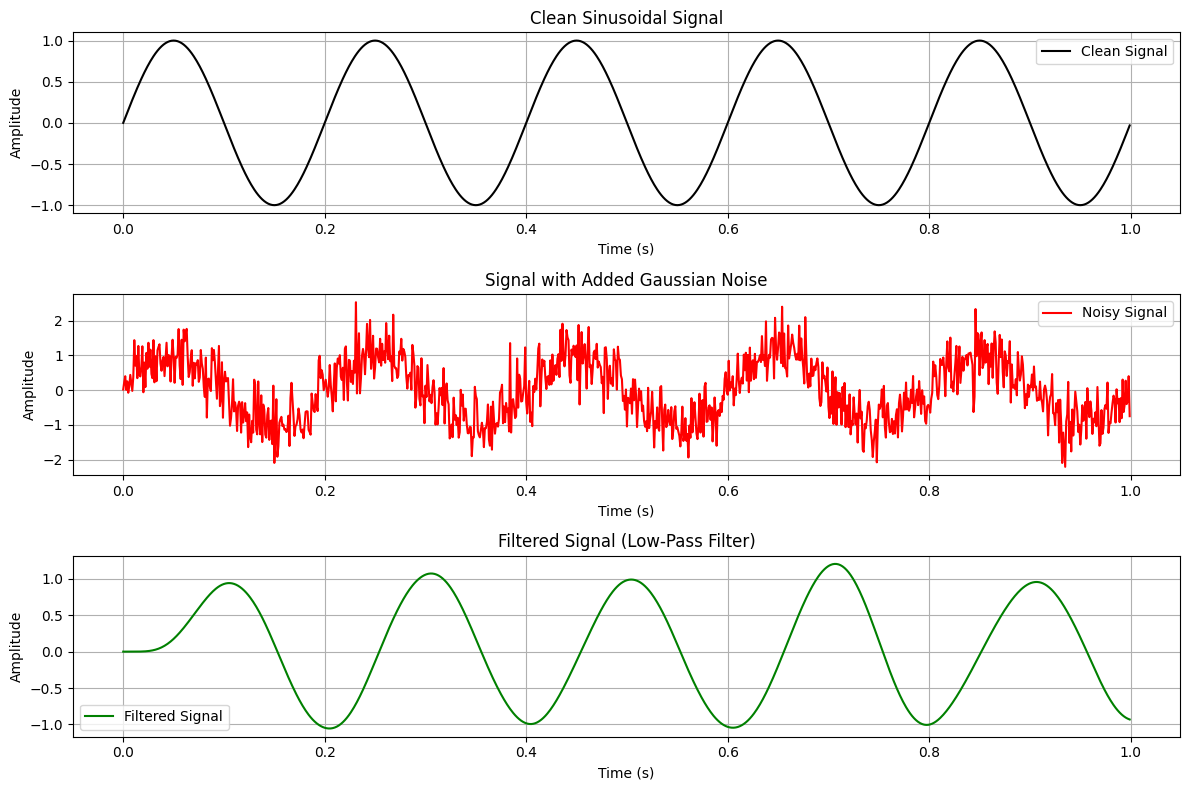

In [20]:
from scipy.signal import butter, lfilter

# Parameters
fs = 1000  
t = np.linspace(0, 1, fs, endpoint=False)  #

# (a) Generate a Clean Sinusoidal Signal
frequency = 5  
amplitude = 1  
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# (b) Add Random Gaussian Noise
noise_level = 0.5  
noise = noise_level * np.random.randn(len(t))
noisy_signal = clean_signal + noise

# (c) Apply a Low-Pass Filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff_frequency = 10  # Cutoff frequency of the low-pass filter (Hz)
filtered_signal = butter_lowpass_filter(noisy_signal, cutoff_frequency, fs)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Clean Signal
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, label='Clean Signal', color='black')
plt.title('Clean Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Noisy Signal
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label='Noisy Signal', color='red')
plt.title('Signal with Added Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Filtered Signal
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Filtered Signal', color='green')
plt.title('Filtered Signal (Low-Pass Filter)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


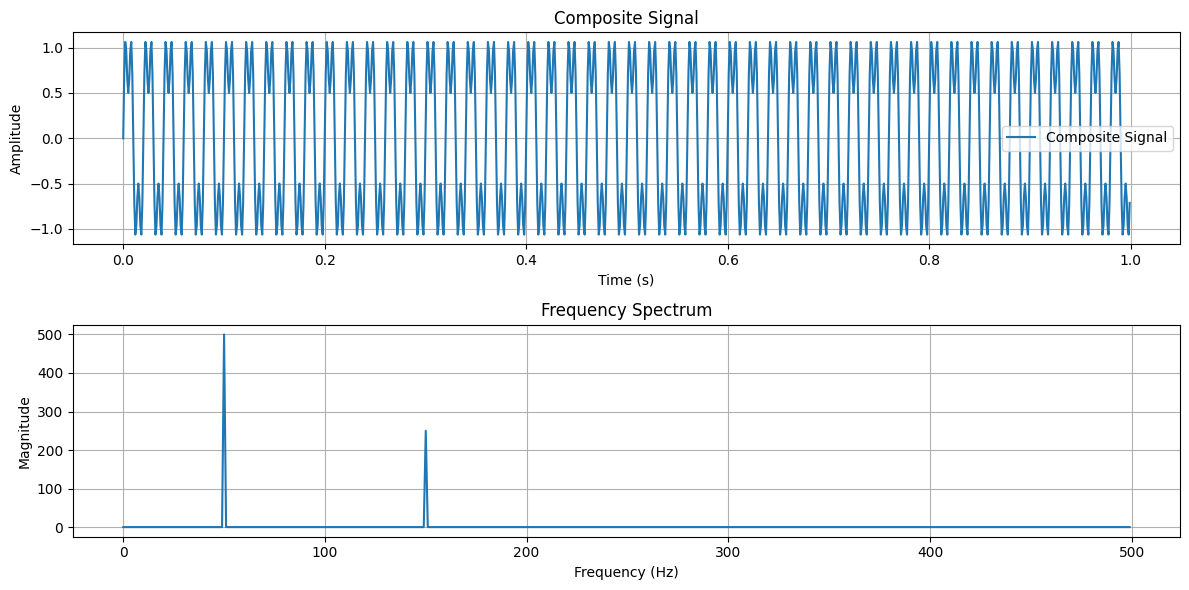

In [21]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 1      # Duration of the signal (seconds)
t = np.linspace(0, T, fs, endpoint=False)  # Time vector

# (a) Generate a Composite Signal
frequency1 = 50 
amplitude1 = 1   
frequency2 = 150 
amplitude2 = 0.5 

# Composite signal
composite_signal = amplitude1 * np.sin(2 * np.pi * frequency1 * t) + amplitude2 * np.sin(2 * np.pi * frequency2 * t)

# (b) Perform the Fast Fourier Transform (FFT)
fft_values = np.fft.fft(composite_signal)
fft_frequencies = np.fft.fftfreq(len(t), 1 / fs)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Composite Signal
plt.subplot(2, 1, 1)
plt.plot(t, composite_signal, label='Composite Signal')
plt.title('Composite Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot Frequency Spectrum
plt.subplot(2, 1, 2)
plt.plot(fft_frequencies[:len(fft_frequencies)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


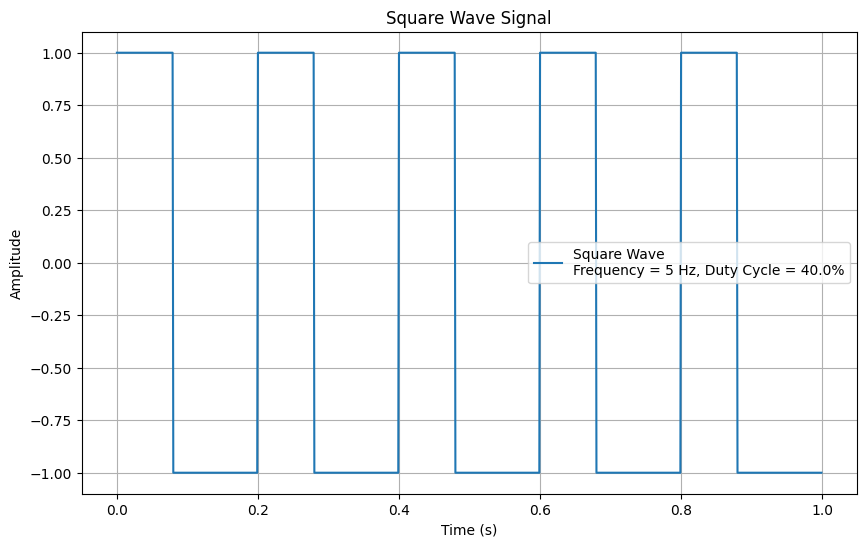

In [22]:
from scipy.signal import square

# Parameters
fs = 1000            
T = 1
frequency = 5        
duty_cycle = 0.4     

# Time vector
t = np.linspace(0, T, int(fs * T), endpoint=False)

# Generate the Square Wave
square_wave = square(2 * np.pi * frequency * t, duty=duty_cycle)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, square_wave, label=f'Square Wave\nFrequency = {frequency} Hz, Duty Cycle = {duty_cycle*100}%')
plt.title('Square Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


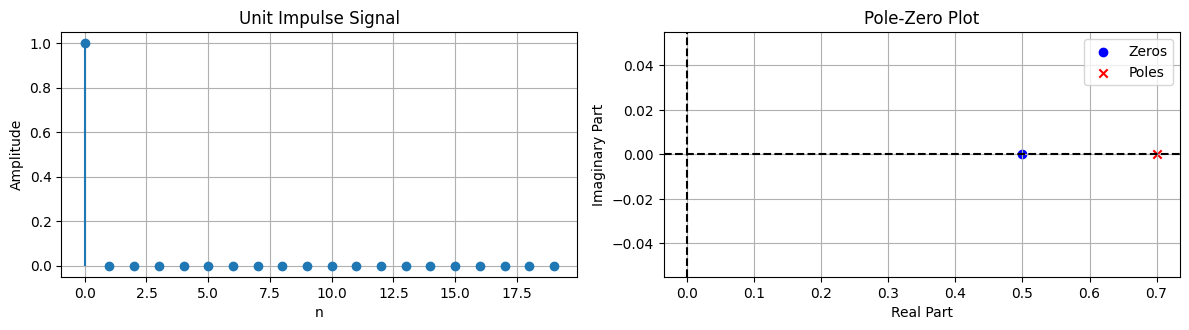

Zeros of the system:  [0.5]
Poles of the system:  [0.7]


In [24]:
from scipy.signal import zpk2tf, tf2zpk

# Parameters
n = 20  

# (a) Generate a Simple Discrete-Time Signal
# Unit Impulse Signal
n_values = np.arange(n)
impulse_signal = np.zeros(n)
impulse_signal[0] = 1  

# (b) Apply the Z-transform and Plot the Z-Domain Representation
z1 = 0.5 
p1 = 0.7  

# Create transfer function coefficients from zeros and poles
b, a = zpk2tf([z1], [p1], 1)

# Compute poles and zeros from the transfer function coefficients
z, p, k = tf2zpk(b, a)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the Unit Impulse Signal
plt.subplot(2, 2, 1)
plt.stem(n_values, impulse_signal, basefmt=" ")
plt.title('Unit Impulse Signal')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the Z-Domain Representation
# Create a pole-zero plot
plt.subplot(2, 2, 2)
plt.scatter(np.real(z), np.imag(z), marker='o', color='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Poles')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.title('Pole-Zero Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# (c) Discuss the Poles and Zeros
print("Zeros of the system: ", z)
print("Poles of the system: ", p)
